# Assigment 3 - Coder
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

In [32]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## 1. Create a 4 dimensional data set with 64 elements and show all 4 scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$,  $x_3$ vs. $y$, $x_4$ vs. $y$

In [33]:
n = 64
x = np.linspace(0, 1, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

## $x_1$ vs. $y$

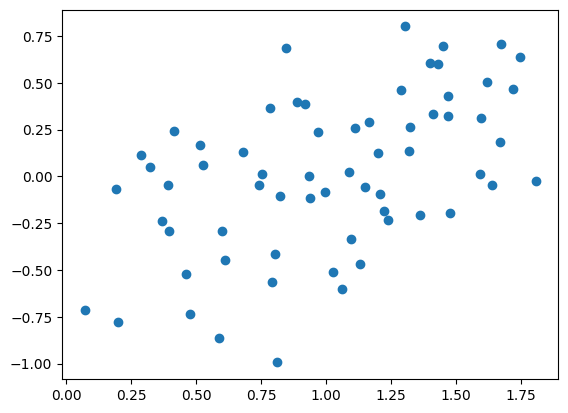

In [34]:
plt.scatter(x.T[0],y)

## $x_2$ vs. $y$

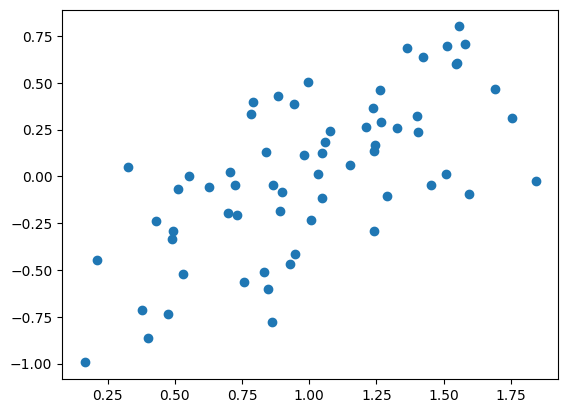

In [35]:
plt.scatter(x.T[1],y)

## $x_3$ vs. $y$

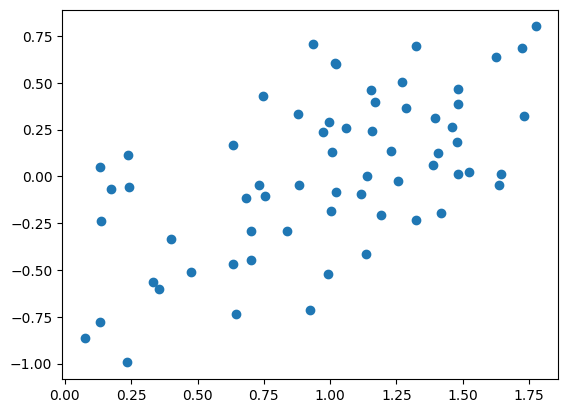

In [36]:
plt.scatter(x.T[2],y)

## $x_4$ vs. $y$

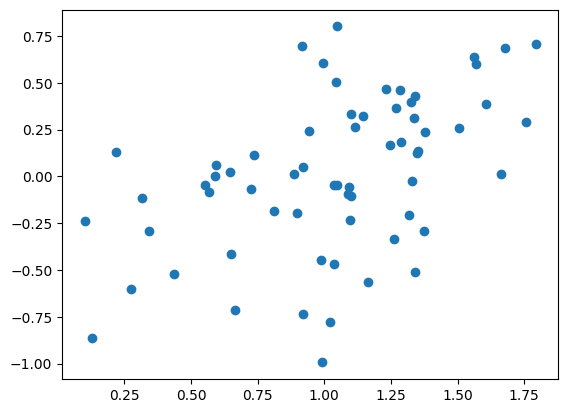

In [37]:
plt.scatter(x.T[3],y)

## 2.  Create a Linear Regression model (LIKE WE DID IN CLASS) to fit the data. *Use the example from Lesson 3 and DO NOT USE a library that calculates automatically*. We are expecting 5 coefficients to describe the linear model. 

In [38]:
left = np.linalg.inv(np.dot(x.T, x))
right = np.dot(y.T, x)
beta = np.dot(left, right)
beta

array([ 0.03323277,  0.41481994,  0.24327771,  0.16603724, -0.8506729 ])

## After creating the model (finding the coefficients), calculate a new column $y_p=\Sigma\beta_n\cdot x_n$ 

In [39]:
pred = np.dot(x, beta)
pred

array([-0.5342546 , -0.62630097, -0.60965778, -0.35595807, -0.51928145,
       -0.28387396, -0.33202531, -0.46913572, -0.25439715, -0.23036245,
       -0.40850247, -0.31230595, -0.19820476, -0.32889708, -0.16658416,
       -0.10218576, -0.30215634, -0.4042707 , -0.30474669, -0.23748438,
       -0.04705607,  0.04373898, -0.10214601,  0.0480595 , -0.13400978,
       -0.11720262, -0.08285935,  0.11653222, -0.06172786,  0.23245796,
        0.08014361,  0.0771893 , -0.21519871,  0.0071616 ,  0.21066399,
        0.30863008, -0.04363147,  0.23006232, -0.01752713,  0.11268869,
        0.0116793 , -0.03135073,  0.09777855,  0.34749077,  0.30302729,
        0.21806285,  0.21216154,  0.19783639,  0.29905805,  0.44104019,
        0.38006217,  0.18925213,  0.45339176,  0.3848098 ,  0.25261937,
        0.24728547,  0.24506539,  0.30734035,  0.44417662,  0.491332  ,
        0.49966149,  0.39075817,  0.47230141,  0.23652012])

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

## $x_1$ vs. $y_p$ 

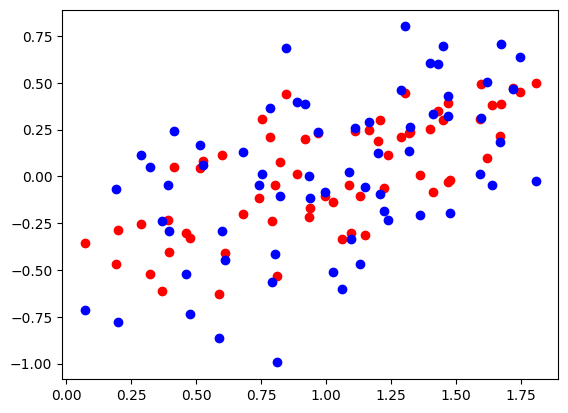

In [40]:
plt.scatter(x.T[0], pred, c='red')
plt.scatter(x.T[0], y, c='b')

## $x_2$ vs. $y_p$

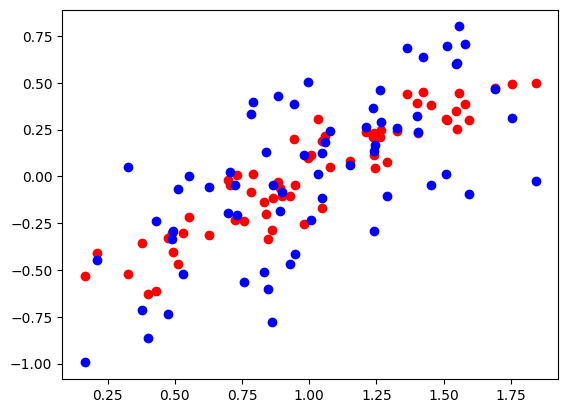

In [41]:
plt.scatter(x.T[1], pred, c='red')
plt.scatter(x.T[1], y, c='b')

## $x_3$ vs. $y_p$

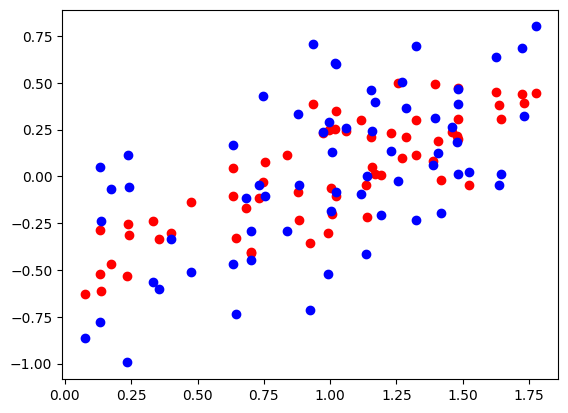

In [42]:
plt.scatter(x.T[2], pred, c='red')
plt.scatter(x.T[2], y, c='b')

## $x_4$ vs. $y_p$

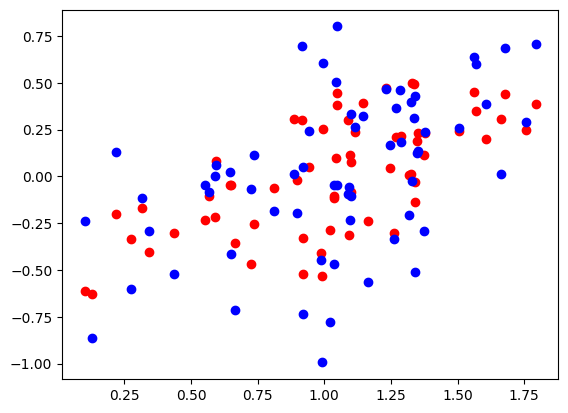

In [43]:
plt.scatter(x.T[3], pred, c='red')
plt.scatter(x.T[3], y, c='b')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating (Column `Rating`)

In [44]:
import pandas as pd
credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [45]:
columns = ['Income', 'Limit', 'Cards', 'Age', 'Education', 'Balance']
credx = credit[columns].values

credx = np.vstack([credx.T, np.ones(len(credx))]).T
credx

array([[1.48910e+01, 3.60600e+03, 2.00000e+00, ..., 1.10000e+01,
        3.33000e+02, 1.00000e+00],
       [1.06025e+02, 6.64500e+03, 3.00000e+00, ..., 1.50000e+01,
        9.03000e+02, 1.00000e+00],
       [1.04593e+02, 7.07500e+03, 4.00000e+00, ..., 1.10000e+01,
        5.80000e+02, 1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 5.00000e+00, ..., 1.20000e+01,
        1.38000e+02, 1.00000e+00],
       [3.77280e+01, 2.52500e+03, 1.00000e+00, ..., 1.30000e+01,
        0.00000e+00, 1.00000e+00],
       [1.87010e+01, 5.52400e+03, 5.00000e+00, ..., 7.00000e+00,
        9.66000e+02, 1.00000e+00]])

In [46]:
credy = credit['Rating']
credy

0      283
1      483
2      514
3      681
4      357
      ... 
395    307
396    296
397    321
398    192
399    415
Name: Rating, Length: 400, dtype: int64

In [47]:
credleft = np.linalg.inv(np.dot(credx.T, credx))
credright = np.dot(credy.T, credx)
credbeta = np.dot(credleft, credright)
credbeta

array([ 9.48157743e-02,  6.42304413e-02,  4.67706085e+00,  8.06617460e-03,
       -2.30863025e-01,  8.18115721e-03,  3.10522106e+01])

### 5. Plot your results using scatter plots (just like in class). Show as many of your columns vs. credit rating that you can.

#### Income vs Credit Rating

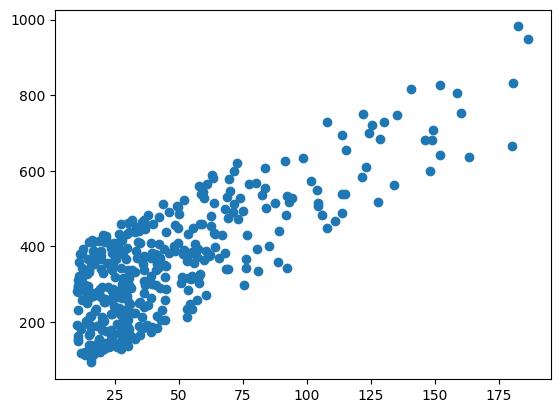

In [48]:
plt.scatter(credx.T[0],credy)

#### Limit vs Credit Rating

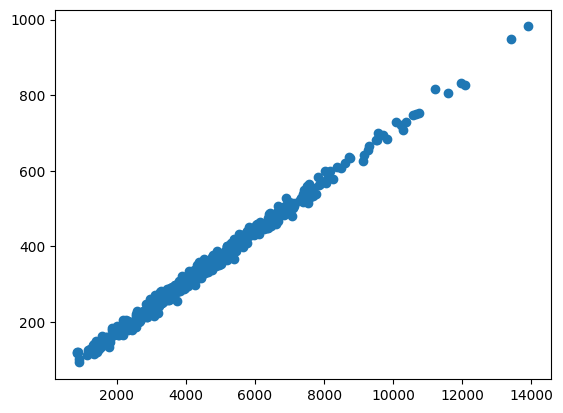

In [49]:
plt.scatter(credx.T[1],credy)

#### Cards vs Credit Rating

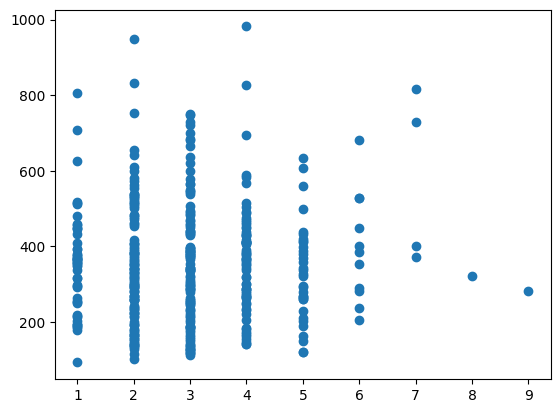

In [50]:
plt.scatter(credx.T[2],credy)

#### Age vs Credit Rating

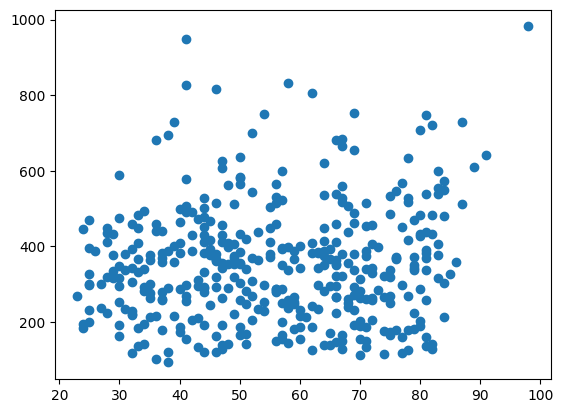

In [51]:
plt.scatter(credx.T[3],credy)

#### Education vs Credit Rating

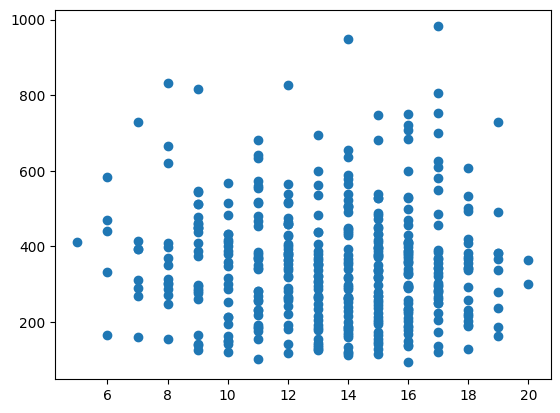

In [52]:
plt.scatter(credx.T[4],credy)

#### Balance vs Credit Rating

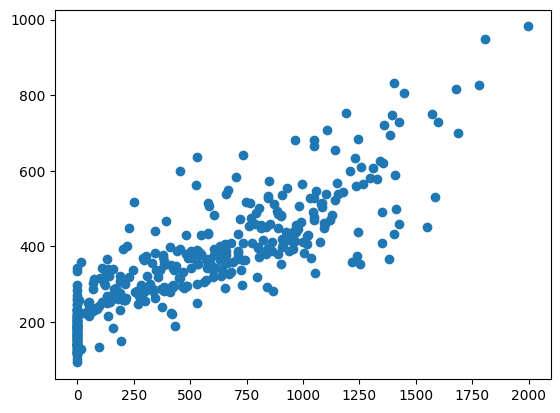

In [53]:
plt.scatter(credx.T[5],credy)